In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [3]:
t_serial_N1200 = 0.019112
t_serial_N12k = 2.798848
t_serial = t_serial_N12k
NB_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex4/output/output_non_blocking"
Blocking_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex4/output/output_blocking"
os.listdir(NB_path)
os.listdir(Blocking_path)

['N12k_1node', 'plots', 'extractTimes.sh', 'N1200', 'N1200_1node', 'N12k']

In [4]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        time = 0
        for line in f.readlines():
                t = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                time = time + float(t[1])
        return time

In [5]:
def read_all_times(dir_path):
    times = []
    for file in os.listdir(dir_path):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = dir_path + "/" + file 
            name = file.split("_")
            avg_time = read_text_file(file_path)
            avg_time = avg_time/int(name[1])
            times.append((int(name[1]),avg_time))
    times.sort()
    procs = []
    tempo = []
    for e in times:
        a,b = e
        procs.append(a)
        tempo.append(b)
    return tempo

In [6]:
def separate_times(totTime, commTime, calcTime, ifBlocking):
    totTime = np.asarray(totTime)
    commTime = np.asarray(commTime)
    calcTime = np.asarray(calcTime)
    if(ifBlocking == "Blocking"):
        compTime = totTime - commTime
    else:
        commTime = commTime - calcTime
        calcTime = totTime - commTime
    return totTime,commTime,calcTime

In [18]:
def make_plots_times(title, labels, commTime, calcTime):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(10,5))
    rects1 = ax.bar(x - width/2, commTime, width, label='CommTime')
    rects2 = ax.bar(x + width/2, calcTime, width, label='CalcTime')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time')
    ax.set_xlabel('procs')
    ax.set_title("Communication and Computation Times" + " " + title ) 
    ax.set_xticks(x)
    ax.legend()
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()

In [19]:
def make_plot_speedup(title, totTime,procs,labels, t_serial):
    speed_up = t_serial/totTime
    plt.figure(figsize=(10,5))
    plt.plot(procs,speed_up)
    plt.title("Speed Up" + " " + title)
    plt.ylabel("speed up")
    plt.xlabel("procs")
    plt.xticks(procs)
    plt.show()

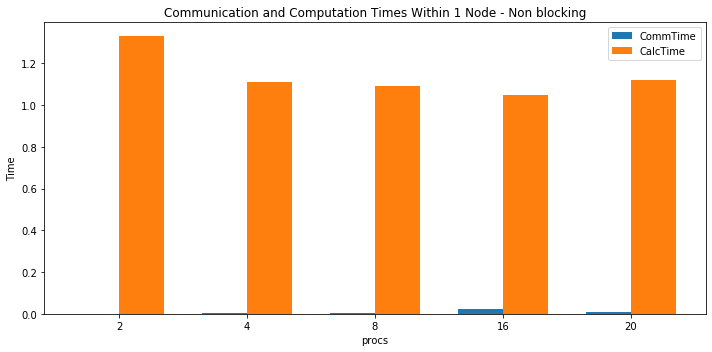

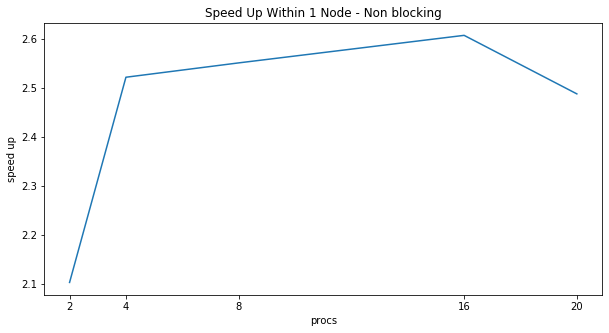

In [9]:
commTime = read_all_times(NB_path + "/N12k_1node/commTime")
totTime = read_all_times(NB_path + "/N12k_1node/totTime")
calcTime = read_all_times(NB_path + "/N12k_1node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "NB")
labels = ["2","4","8","16","20"]
procs = np.asarray([2,4,8,16,20])
t_serial = 2.798848
title = "Within 1 Node - Non blocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(title, totTime,procs,labels, t_serial)

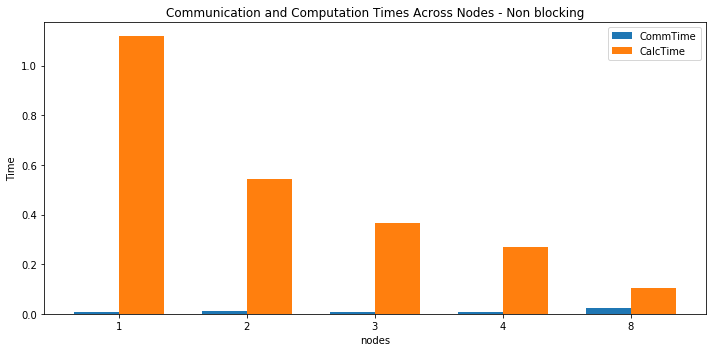

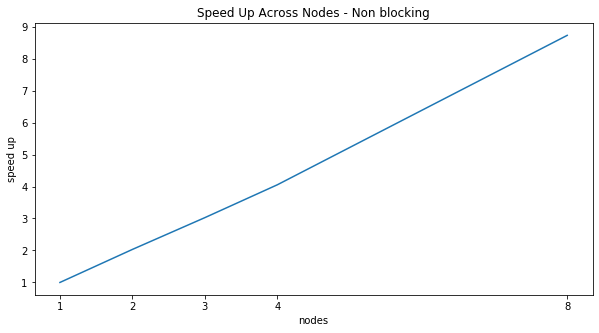

In [16]:
commTime = read_all_times(NB_path + "/N12k/commTime")
totTime = read_all_times(NB_path + "/N12k/totTime")
calcTime = read_all_times(NB_path + "/N12k/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "NB")
labels = ["1","2","3","4","8"]
procs = np.asarray([1,2,3,4,8])
t_serial = totTime[0]
title = "Across Nodes - Non blocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(title, totTime,procs,labels, t_serial)

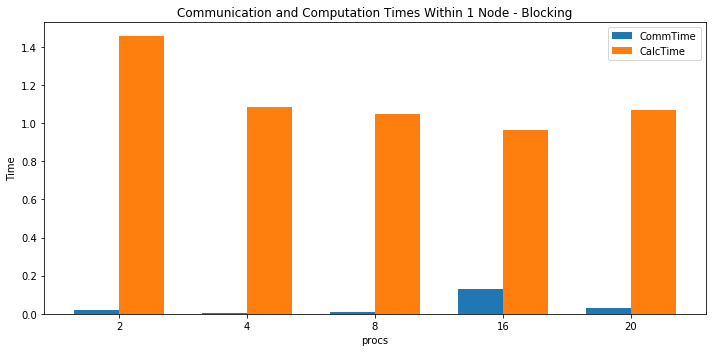

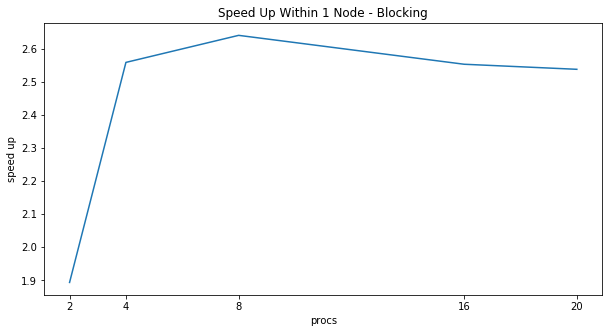

In [20]:
commTime = read_all_times(Blocking_path + "/N12k_1node/commTime")
totTime = read_all_times(Blocking_path + "/N12k_1node/totTime")
calcTime = read_all_times(Blocking_path + "/N12k_1node/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "Blocking")
labels = ["2","4","8","16","20"]
procs = np.asarray([2,4,8,16,20])
t_serial = 2.798848
title = "Within 1 Node - Blocking"
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(title, totTime,procs,labels, t_serial)

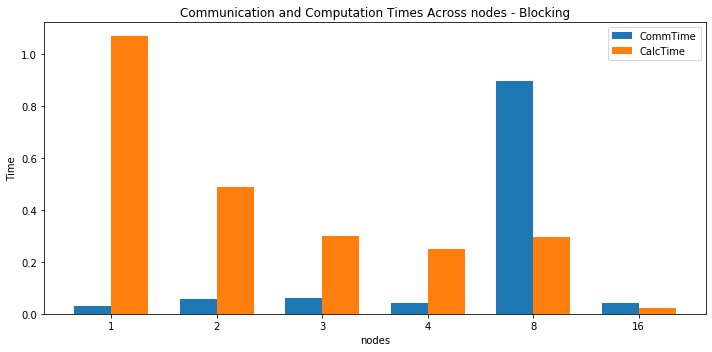

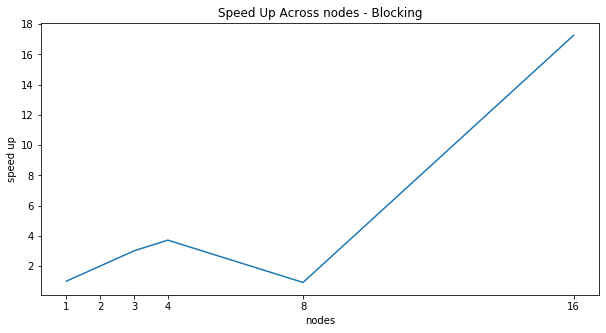

In [17]:
commTime = read_all_times(Blocking_path + "/N12k/commTime")
totTime = read_all_times(Blocking_path + "/N12k/totTime")
calcTime = read_all_times(Blocking_path + "/N12k/calcTime")
totTime, commTime, calcTime = separate_times(totTime, commTime, calcTime, "Blocking")
labels = ["1","2","3","4","8","16"]
procs = np.asarray([1,2,3,4,8,16])
title = "Across nodes - Blocking"
t_serial = totTime[0]
make_plots_times(title,labels,commTime,calcTime)
make_plot_speedup(title, totTime,procs,labels,t_serial)